Quality of coffee =  9.582204717247762


<IPython.core.display.Javascript object>


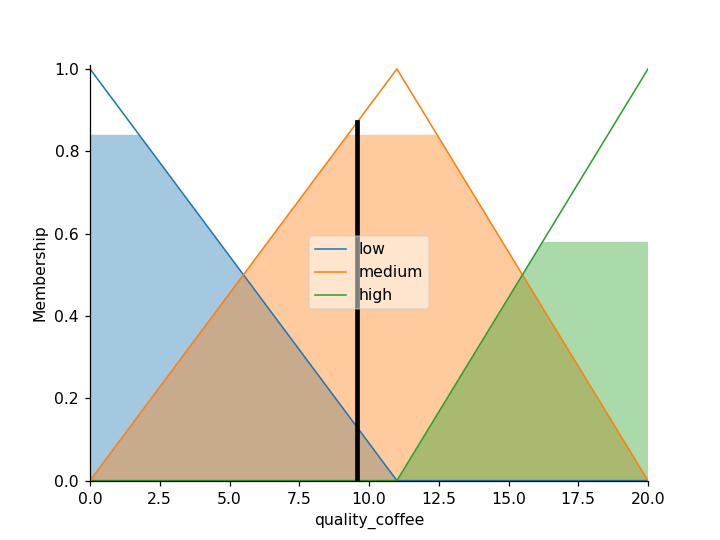

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

color_coffee = ctrl.Antecedent(np.arange(0, 11, 1), 'color_coffee')
smell_coffee = ctrl.Antecedent(np.arange(0, 11, 1), 'smell_coffee')
taste_coffee = ctrl.Antecedent(np.arange(0, 11, 1), 'taste_coffee')
quality_coffee = ctrl.Consequent(np.arange(0, 21, 1), 'quality_coffee')

color_coffee.automf(3)
smell_coffee.automf(3)
taste_coffee.automf(3)

quality_coffee['low'] = fuzz.trimf(quality_coffee.universe, [0, 0, 11])
quality_coffee['medium'] = fuzz.trimf(quality_coffee.universe, [0, 11, 20])
quality_coffee['high'] = fuzz.trimf(quality_coffee.universe, [11, 20, 20])

rule1 = ctrl.Rule(color_coffee['poor'] | smell_coffee['poor'] | taste_coffee['poor'], quality_coffee['low'])
rule2 = ctrl.Rule(color_coffee['average'] | smell_coffee['poor'] | taste_coffee['poor'], quality_coffee['low'])
rule3 = ctrl.Rule(color_coffee['average'] | smell_coffee['average'] | taste_coffee['average'], quality_coffee['medium'])
rule4 = ctrl.Rule(color_coffee['good'] | smell_coffee['average'] | taste_coffee['average'], quality_coffee['medium'])
rule5 = ctrl.Rule(color_coffee['good'] | smell_coffee['good'] | taste_coffee['good'], quality_coffee['high'])

quality_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5])

quality = ctrl.ControlSystemSimulation(quality_ctrl)

quality.input['color_coffee'] = 5.8
quality.input['smell_coffee'] = 6.7
quality.input['taste_coffee'] = 7.9

quality.compute()

print("Quality of coffee = " ,quality.output['quality_coffee'])
quality_coffee.view(sim=quality)